REGRESIÓN MULTIPLE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#JALAMOS DATASET
df = pd.read_csv('NEWYORK_SINATIPICOS1.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36322 entries, 0 to 36321
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            36322 non-null  float64
 1   listing_url                                   36322 non-null  object 
 2   scrape_id                                     36322 non-null  float64
 3   last_scraped                                  36322 non-null  object 
 4   source                                        36322 non-null  object 
 5   name                                          36322 non-null  object 
 6   description                                   36322 non-null  object 
 7   neighborhood_overview                         36322 non-null  object 
 8   picture_url                                   36322 non-null  object 
 9   host_id                                       36322 non-null 

In [6]:
import numpy as np

num = df.select_dtypes(include=[np.number]).copy()

# 1) quitar columnas con muy pocos datos y sin variación
ok = (num.count() >= 2) & (num.nunique(dropna=True) > 1)
num = num.loc[:, ok]

# 2) (opcional) quitar IDs si son numéricos
num = num.drop(columns=[c for c in ['id','host_id','scrape_id'] if c in num.columns],
               errors='ignore')

# 3) matriz de correlación sin NaN
C = num.corr()
C

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,price,maximum_nights,minimum_maximum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,reviews_per_month
host_response_rate,1.000000,0.149621,0.266642,0.253604,0.021136,-0.015867,0.018621,-0.154307,-0.213760,-0.205277,...,0.017017,0.031391,0.021896,0.016107,0.019441,0.009270,0.251835,0.187563,-0.021505,0.184362
host_acceptance_rate,0.149621,1.000000,0.025791,-0.003106,-0.029093,-0.029522,0.055163,0.065707,-0.040556,0.051251,...,0.040785,0.048781,0.040126,0.039723,0.038589,0.043182,0.006858,-0.015060,0.050878,0.076133
host_listings_count,0.266642,0.025791,1.000000,0.688331,0.000539,0.008361,0.006226,-0.141192,-0.130764,-0.109913,...,0.007215,0.013413,0.013963,0.010849,0.012519,0.003438,0.790778,0.071415,0.088859,0.063116
host_total_listings_count,0.253604,-0.003106,0.688331,1.000000,0.003460,0.013276,-0.007317,-0.134774,-0.123479,-0.100911,...,-0.009767,-0.003624,-0.003147,-0.007755,-0.003879,-0.014746,0.601117,0.089644,0.071059,0.055347
latitude,0.021136,-0.029093,0.000539,0.003460,1.000000,0.062369,-0.020298,0.064004,0.070987,0.028628,...,-0.050617,-0.052816,-0.049138,-0.050064,-0.041796,-0.054390,0.021721,0.022576,-0.025143,-0.041994
longitude,-0.015867,-0.029522,0.008361,0.013276,0.062369,1.000000,-0.094244,-0.316186,-0.052812,0.023746,...,0.059628,0.058143,0.059394,0.059804,0.034344,0.063556,0.001308,-0.030215,0.131574,0.066265
accommodates,0.018621,0.055163,0.006226,-0.007317,-0.020298,-0.094244,1.000000,0.366595,0.024279,0.024844,...,0.073256,0.077061,0.072666,0.074101,0.072900,0.071019,0.004389,0.309290,-0.222766,0.000766
price,-0.154307,0.065707,-0.141192,-0.134774,0.064004,-0.316186,0.366595,1.000000,0.159056,0.126494,...,-0.044625,-0.043823,-0.048873,-0.046124,-0.036519,-0.048407,-0.124474,0.237604,-0.304465,-0.136645
maximum_nights,-0.213760,-0.040556,-0.130764,-0.123479,0.070987,-0.052812,0.024279,0.159056,1.000000,0.730637,...,-0.042830,-0.051763,-0.043423,-0.042073,-0.039633,-0.042550,-0.126971,-0.000133,-0.075843,-0.128354
minimum_maximum_nights,-0.205277,0.051251,-0.109913,-0.100911,0.028628,0.023746,0.024844,0.126494,0.730637,1.000000,...,0.054441,0.046462,0.053143,0.055365,0.052124,0.056060,-0.111441,0.025969,-0.044775,-0.070892


In [8]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(C)
Corr_Factors1

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,price,maximum_nights,minimum_maximum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,reviews_per_month
host_response_rate,1.000000,0.149621,0.266642,0.253604,0.021136,0.015867,0.018621,0.154307,0.213760,0.205277,...,0.017017,0.031391,0.021896,0.016107,0.019441,0.009270,0.251835,0.187563,0.021505,0.184362
host_acceptance_rate,0.149621,1.000000,0.025791,0.003106,0.029093,0.029522,0.055163,0.065707,0.040556,0.051251,...,0.040785,0.048781,0.040126,0.039723,0.038589,0.043182,0.006858,0.015060,0.050878,0.076133
host_listings_count,0.266642,0.025791,1.000000,0.688331,0.000539,0.008361,0.006226,0.141192,0.130764,0.109913,...,0.007215,0.013413,0.013963,0.010849,0.012519,0.003438,0.790778,0.071415,0.088859,0.063116
host_total_listings_count,0.253604,0.003106,0.688331,1.000000,0.003460,0.013276,0.007317,0.134774,0.123479,0.100911,...,0.009767,0.003624,0.003147,0.007755,0.003879,0.014746,0.601117,0.089644,0.071059,0.055347
latitude,0.021136,0.029093,0.000539,0.003460,1.000000,0.062369,0.020298,0.064004,0.070987,0.028628,...,0.050617,0.052816,0.049138,0.050064,0.041796,0.054390,0.021721,0.022576,0.025143,0.041994
longitude,0.015867,0.029522,0.008361,0.013276,0.062369,1.000000,0.094244,0.316186,0.052812,0.023746,...,0.059628,0.058143,0.059394,0.059804,0.034344,0.063556,0.001308,0.030215,0.131574,0.066265
accommodates,0.018621,0.055163,0.006226,0.007317,0.020298,0.094244,1.000000,0.366595,0.024279,0.024844,...,0.073256,0.077061,0.072666,0.074101,0.072900,0.071019,0.004389,0.309290,0.222766,0.000766
price,0.154307,0.065707,0.141192,0.134774,0.064004,0.316186,0.366595,1.000000,0.159056,0.126494,...,0.044625,0.043823,0.048873,0.046124,0.036519,0.048407,0.124474,0.237604,0.304465,0.136645
maximum_nights,0.213760,0.040556,0.130764,0.123479,0.070987,0.052812,0.024279,0.159056,1.000000,0.730637,...,0.042830,0.051763,0.043423,0.042073,0.039633,0.042550,0.126971,0.000133,0.075843,0.128354
minimum_maximum_nights,0.205277,0.051251,0.109913,0.100911,0.028628,0.023746,0.024844,0.126494,0.730637,1.000000,...,0.054441,0.046462,0.053143,0.055365,0.052124,0.056060,0.111441,0.025969,0.044775,0.070892


In [25]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Convierte strings con %, $ y comas a numérico
def _to_num(s):
    return pd.to_numeric(pd.Series(s, copy=True).astype(str)
                         .str.replace(r'[\$,()%]', '', regex=True),
                         errors='coerce')

# Asegura que estas columnas sean numéricas
def _prep_numeric(cols):
    for c in cols:
        if c in df.columns and not pd.api.types.is_numeric_dtype(df[c]):
            df[c] = _to_num(df[c])


In [33]:
# Helpers de gráficos (ejecuta esta celda una vez)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

def plot_model_graphs(d, y, X, y_pred, titulo):
    n = len(X)
    fig, axes = plt.subplots(1, n, figsize=(6*n, 4))
    if n == 1:
        axes = [axes]
    for ax, xcol in zip(axes, X):
        # puntos reales
        sns.scatterplot(x=d[xcol], y=d[y], alpha=0.6, label='Real', ax=ax)
        # puntos predichos usando el mismo eje X para comparar
        sns.scatterplot(x=d[xcol], y=y_pred, alpha=0.6, label='Predicho', ax=ax)
        ax.set_xlabel(xcol); ax.set_ylabel(y)
        ax.set_title(f'{y} vs {xcol}')
        ax.legend(loc='best')
    plt.tight_layout()
    plt.show()

    # Parity plot: y_real vs y_pred
    plt.figure(figsize=(5,5))
    sns.scatterplot(x=d[y], y=y_pred, alpha=0.7)
    lo = np.nanmin([d[y].min(), np.min(y_pred)])
    hi = np.nanmax([d[y].max(), np.max(y_pred)])
    plt.plot([lo, hi], [lo, hi], '--')
    plt.xlabel('Real'); plt.ylabel('Predicho')
    plt.title(f'{titulo}: real vs predicho')
    plt.tight_layout()
    plt.show()


In [26]:
y = 'review_scores_rating'
X = ['review_scores_accuracy', 'review_scores_cleanliness']
_prep_numeric([y] + X)

d = df[[y] + X].dropna()
model_1 = LinearRegression().fit(d[X], d[y])

print("Coeficientes:", dict(zip(X, model_1.coef_)))
print("Intercept:", model_1.intercept_)
print("R2:", model_1.score(d[X], d[y]))


Coeficientes: {'review_scores_accuracy': np.float64(0.6327943613878535), 'review_scores_cleanliness': np.float64(0.36389741278780274)}
Intercept: 0.011342110846953801
R2: 0.9903156071869521


In [27]:
y_pred_1 = model_1.predict(d[X])
y_pred_1


array([4.91886566, 4.68930446, 4.65465368, ..., 0.01134211, 0.01134211,
       0.01134211], shape=(36322,))

In [28]:

df['pred_review_scores_rating'] = np.nan
df.loc[d.index, 'pred_review_scores_rating'] = y_pred_1
df[['pred_review_scores_rating', 'review_scores_rating'] + X].head(10)


,pred_review_scores_rating,review_scores_rating,review_scores_accuracy,review_scores_cleanliness
0,4.918866,4.89,4.88,5.00
1,4.689304,4.68,4.73,4.63
2,4.654654,4.75,4.75,4.50
3,4.687099,4.59,4.60,4.85
4,4.994801,5.00,5.00,5.00
5,4.869031,4.88,4.83,4.95
6,4.962050,4.91,5.00,4.91
7,4.891493,4.89,4.90,4.89
8,4.654654,4.75,4.75,4.50
9,4.824091,4.81,4.92,4.67


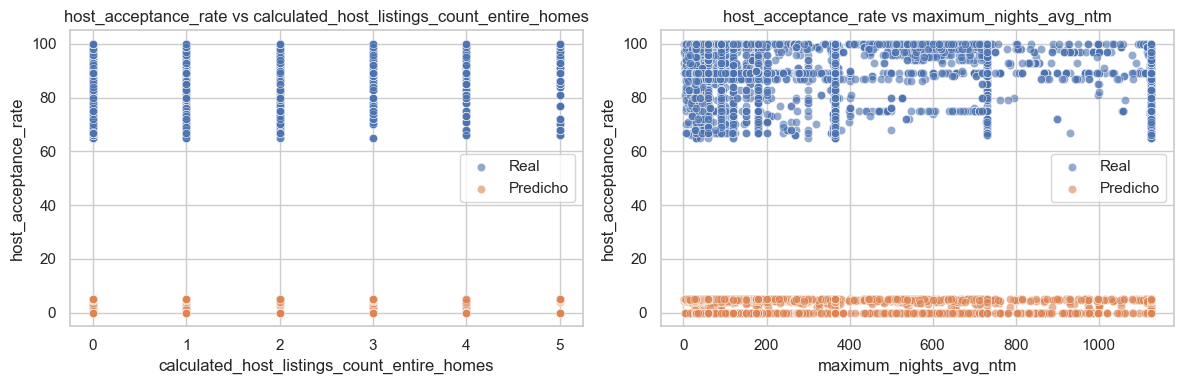

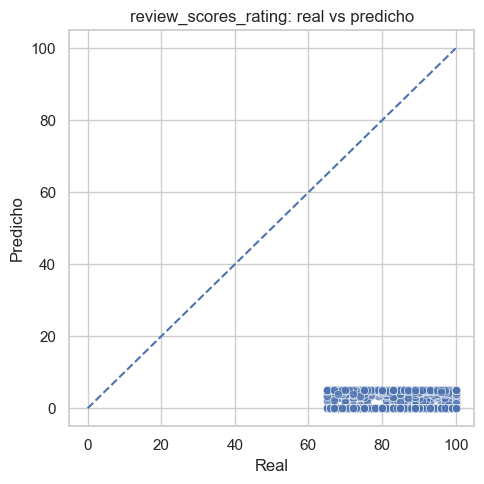

In [34]:
# Gráficas de diagnóstico
plot_model_graphs(d, y, X, y_pred_1, 'review_scores_rating')


In [30]:

y = 'host_acceptance_rate'
X = ['calculated_host_listings_count_entire_homes', 'maximum_nights_avg_ntm']
_prep_numeric([y] + X)
d = df[[y] + X].dropna()
model_2 = LinearRegression().fit(d[X], d[y])
print("Coef:", dict(zip(X, model_2.coef_)))
print("Intercept:", model_2.intercept_)
print("R2:", model_2.score(d[X], d[y]))


Coef: {'calculated_host_listings_count_entire_homes': np.float64(-0.11908897516058593), 'maximum_nights_avg_ntm': np.float64(0.0010498662627308128)}
Intercept: 89.73924414985676
R2: 0.005204549344264842


In [31]:

y_pred_2 = model_2.predict(d[X])
y_pred_2


array([90.38655755, 90.56307677, 90.38655755, ..., 89.8652281 ,
       89.88426739, 89.65690049], shape=(36322,))

In [32]:

df['pred_host_acceptance_rate'] = np.nan
df.loc[d.index, 'pred_host_acceptance_rate'] = y_pred_2
df[['pred_host_acceptance_rate', 'host_acceptance_rate'] + X].head(10)


,pred_host_acceptance_rate,host_acceptance_rate,calculated_host_listings_count_entire_homes,maximum_nights_avg_ntm
0,90.386558,80.0,1.0,730.0
1,90.563077,89.0,3.0,1125.0
2,90.386558,100.0,1.0,730.0
3,89.746139,100.0,1.0,120.0
4,89.928220,89.0,0.0,180.0
5,89.865228,86.0,0.0,120.0
6,89.786488,89.0,0.0,45.0
7,90.920344,100.0,0.0,1125.0
8,90.386558,89.0,1.0,730.0
9,89.698895,89.0,1.0,75.0


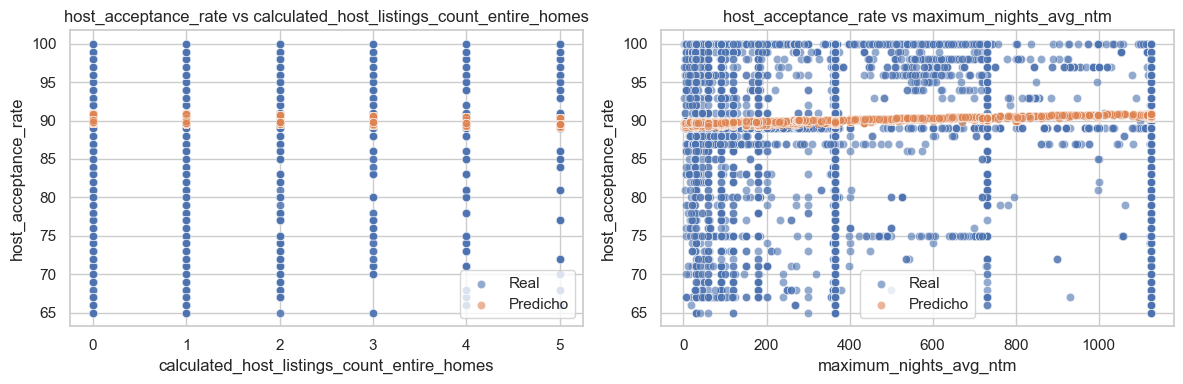

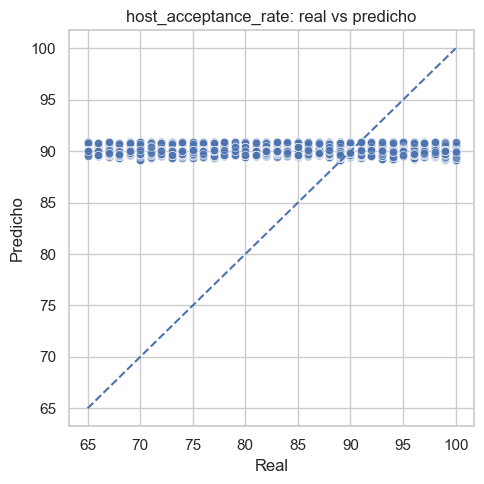

In [35]:

plot_model_graphs(d, y, X, y_pred_2, 'host_acceptance_rate')


In [36]:

y = 'host_total_listings_count'
X = ['host_listings_count', 'calculated_host_listings_count']
_prep_numeric([y] + X)
d = df[[y] + X].dropna()
model_3 = LinearRegression().fit(d[X], d[y])
print("Coef:", dict(zip(X, model_3.coef_)))
print("Intercept:", model_3.intercept_)
print("R2:", model_3.score(d[X], d[y]))


Coef: {'host_listings_count': np.float64(0.8483832269421377), 'calculated_host_listings_count': np.float64(0.28187960480155105)}
Intercept: 1.2617719841104433
R2: 0.48241017695564625


In [37]:

y_pred_3 = model_3.predict(d[X])
y_pred_3


array([ 8.04334897,  8.04609339,  2.39203482, ...,  3.52229765,
       11.15774669,  2.39203482], shape=(36322,))

In [38]:

df['pred_host_total_listings_count'] = np.nan
df.loc[d.index, 'pred_host_total_listings_count'] = y_pred_3
df[['pred_host_total_listings_count', 'host_total_listings_count'] + X].head(10)


,pred_host_total_listings_count,host_total_listings_count,host_listings_count,calculated_host_listings_count
0,8.043349,13.0,6.0,6.0
1,8.046093,9.0,7.0,3.0
2,2.392035,5.0,1.0,1.0
3,2.392035,1.0,1.0,1.0
4,3.522298,2.0,2.0,2.0
5,2.392035,6.0,1.0,1.0
6,3.522298,2.0,2.0,2.0
7,3.522298,2.0,2.0,2.0
8,13.412784,11.0,11.0,10.0
9,2.392035,2.0,1.0,1.0


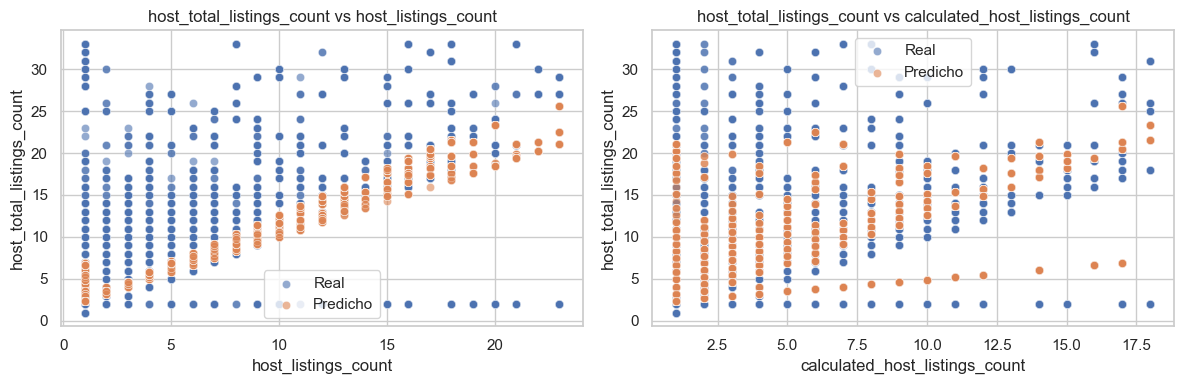

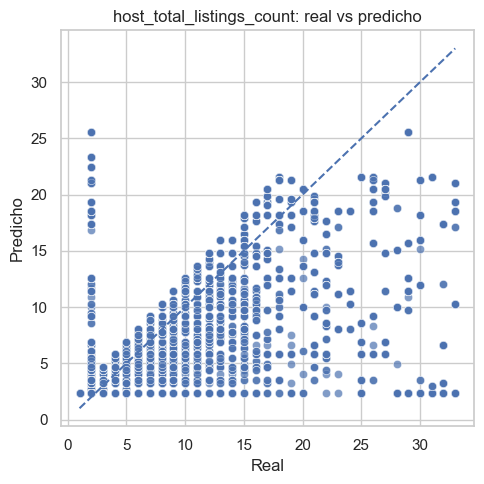

In [39]:

plot_model_graphs(d, y, X, y_pred_3, 'host_total_listings_count')


In [40]:

y = 'accommodates'
X = ['bedrooms', 'beds']
_prep_numeric([y] + X)
d = df[[y] + X].dropna()
model_4 = LinearRegression().fit(d[X], d[y])
print("Coef:", dict(zip(X, model_4.coef_)))
print("Intercept:", model_4.intercept_)
print("R2:", model_4.score(d[X], d[y]))


Coef: {'bedrooms': np.float64(0.0), 'beds': np.float64(0.0)}
Intercept: 2.516986950057816
R2: 0.0


In [41]:

y_pred_4 = model_4.predict(d[X])
y_pred_4


array([2.51698695, 2.51698695, 2.51698695, ..., 2.51698695, 2.51698695,
       2.51698695], shape=(36322,))

In [42]:

df['pred_accommodates'] = np.nan
df.loc[d.index, 'pred_accommodates'] = y_pred_4
df[['pred_accommodates', 'accommodates'] + X].head(10)


,pred_accommodates,accommodates,bedrooms,beds
0,2.516987,2.0,1.0,1.0
1,2.516987,1.0,1.0,1.0
2,2.516987,4.0,1.0,1.0
3,2.516987,3.0,1.0,1.0
4,2.516987,1.0,1.0,1.0
5,2.516987,1.0,1.0,1.0
6,2.516987,2.0,1.0,1.0
7,2.516987,2.0,1.0,1.0
8,2.516987,2.0,1.0,1.0
9,2.516987,2.0,1.0,1.0


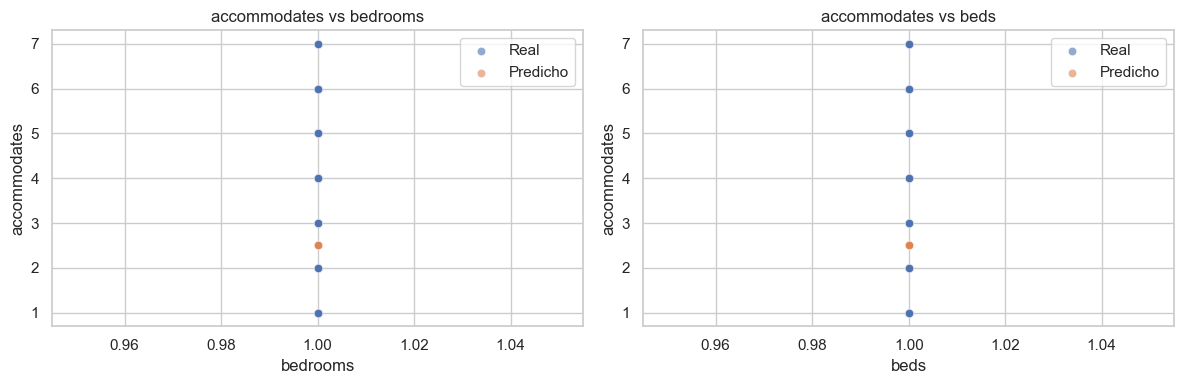

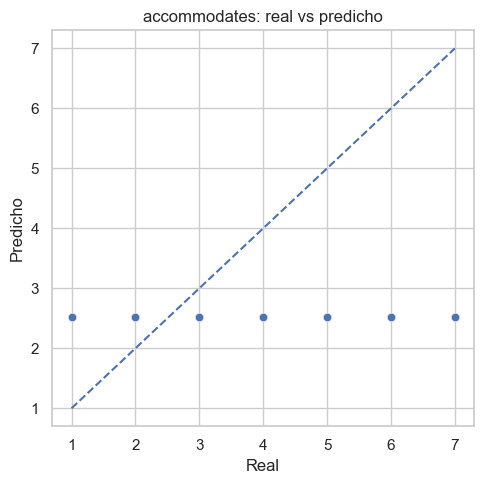

In [43]:

plot_model_graphs(d, y, X, y_pred_4, 'accommodates')


In [44]:

y = 'bedrooms'
X = ['accommodates', 'beds']
_prep_numeric([y] + X)
d = df[[y] + X].dropna()
model_5 = LinearRegression().fit(d[X], d[y])
print("Coef:", dict(zip(X, model_5.coef_)))
print("Intercept:", model_5.intercept_)
print("R2:", model_5.score(d[X], d[y]))


Coef: {'accommodates': np.float64(0.0), 'beds': np.float64(0.0)}
Intercept: 1.0
R2: 1.0


In [45]:

y_pred_5 = model_5.predict(d[X])
y_pred_5


array([1., 1., 1., ..., 1., 1., 1.], shape=(36322,))

In [46]:

df['pred_bedrooms'] = np.nan
df.loc[d.index, 'pred_bedrooms'] = y_pred_5
df[['pred_bedrooms', 'bedrooms'] + X].head(10)


,pred_bedrooms,bedrooms,accommodates,beds
0,1.0,1.0,2.0,1.0
1,1.0,1.0,1.0,1.0
2,1.0,1.0,4.0,1.0
3,1.0,1.0,3.0,1.0
4,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0
6,1.0,1.0,2.0,1.0
7,1.0,1.0,2.0,1.0
8,1.0,1.0,2.0,1.0
9,1.0,1.0,2.0,1.0


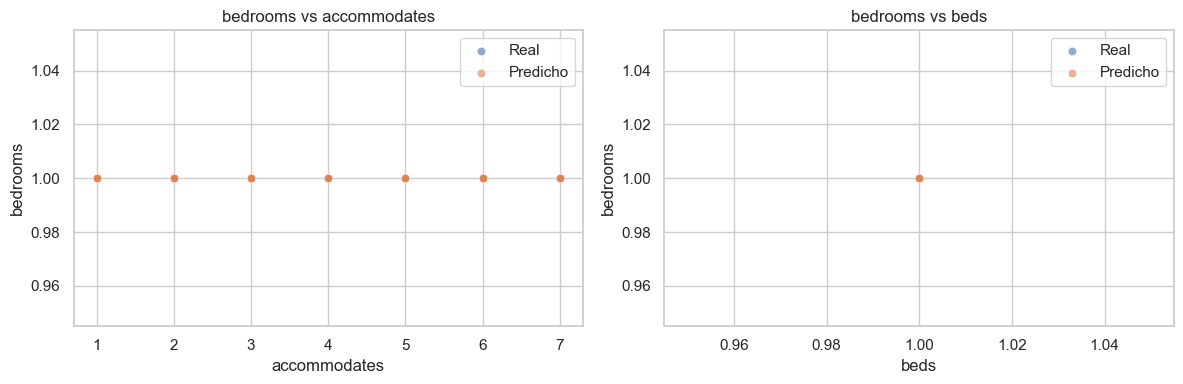

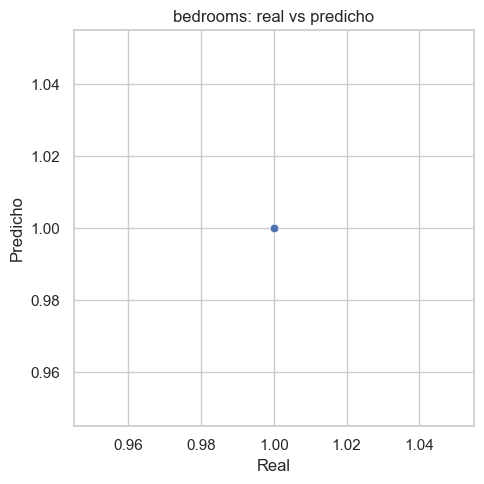

In [47]:

plot_model_graphs(d, y, X, y_pred_5, 'bedrooms')


In [48]:

y = 'price'
X = ['accommodates', 'bathrooms']
_prep_numeric([y] + X)  # convierte strings de precio si aplica
d = df[[y] + X].dropna()
model_6 = LinearRegression().fit(d[X], d[y])
print("Coef:", dict(zip(X, model_6.coef_)))
print("Intercept:", model_6.intercept_)
print("R2:", model_6.score(d[X], d[y]))


Coef: {'accommodates': np.float64(28.50520142259903), 'bathrooms': np.float64(0.0)}
Intercept: 129.32288809286905
R2: 0.13439158251208705


In [49]:

y_pred_6 = model_6.predict(d[X])
y_pred_6


array([186.33329094, 157.82808952, 243.34369378, ..., 157.82808952,
       243.34369378, 271.84889521], shape=(36322,))

In [50]:

df['pred_price'] = np.nan
df.loc[d.index, 'pred_price'] = y_pred_6
df[['pred_price', 'price'] + X].head(10)


,pred_price,price,accommodates,bathrooms
0,186.333291,285.000000,2.0,1.0
1,157.828090,240.000000,1.0,1.0
2,243.343694,215.000000,4.0,1.0
3,214.838492,97.000000,3.0,1.0
4,157.828090,167.778610,1.0,1.0
5,157.828090,63.000000,1.0,1.0
6,186.333291,167.778610,2.0,1.0
7,186.333291,246.000000,2.0,1.0
8,186.333291,223.000000,2.0,1.0
9,186.333291,306.338406,2.0,1.0


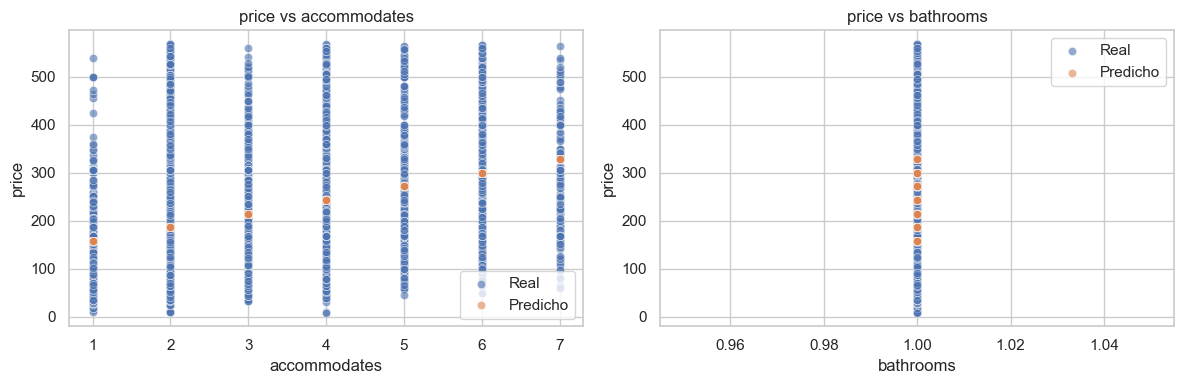

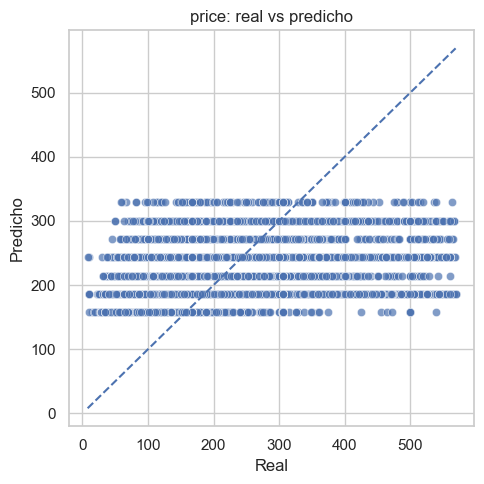

In [51]:

plot_model_graphs(d, y, X, y_pred_6, 'price')


In [52]:

y = 'review_scores_value'
X = ['review_scores_rating', 'review_scores_cleanliness']
_prep_numeric([y] + X)
d = df[[y] + X].dropna()
model_7 = LinearRegression().fit(d[X], d[y])
print("Coef:", dict(zip(X, model_7.coef_)))
print("Intercept:", model_7.intercept_)
print("R2:", model_7.score(d[X], d[y]))


Coef: {'review_scores_rating': np.float64(0.807966751921964), 'review_scores_cleanliness': np.float64(0.17415123534958885)}
Intercept: 0.005942211266000363
R2: 0.9863163850408705


In [53]:

y_pred_7 = model_7.predict(d[X])
y_pred_7


array([4.8276558 , 4.59354683, 4.62746484, ..., 0.00594221, 0.00594221,
       0.00594221], shape=(36322,))

In [54]:

df['pred_review_scores_value'] = np.nan
df.loc[d.index, 'pred_review_scores_value'] = y_pred_7
df[['pred_review_scores_value', 'review_scores_value'] + X].head(10)


,pred_review_scores_value,review_scores_value,review_scores_rating,review_scores_cleanliness
0,4.827656,4.88,4.89,5.00
1,4.593547,4.40,4.68,4.63
2,4.627465,4.75,4.75,4.50
3,4.559143,4.58,4.59,4.85
4,4.916532,5.00,5.00,5.00
5,4.810869,4.83,4.88,4.95
6,4.828142,5.00,4.91,4.91
7,4.808499,4.82,4.89,4.89
8,4.627465,4.75,4.75,4.50
9,4.705549,4.69,4.81,4.67


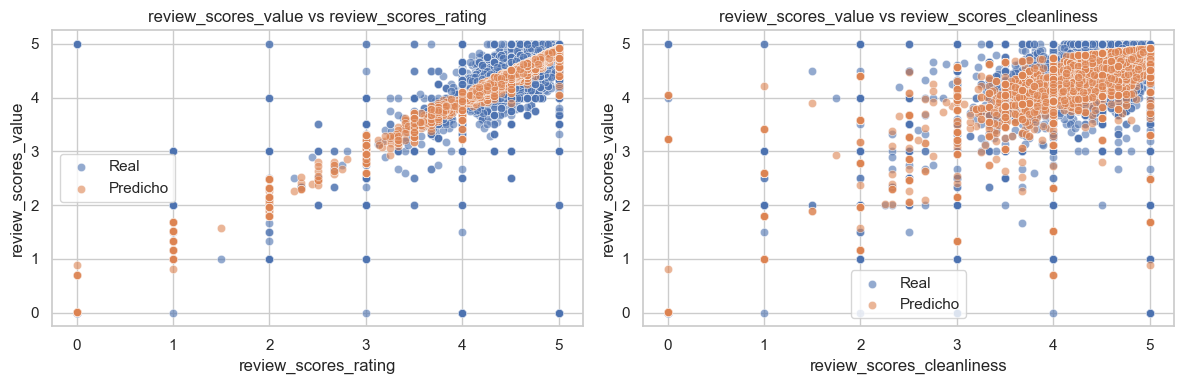

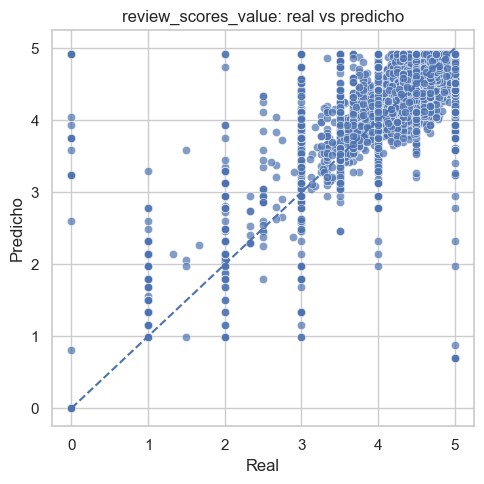

In [55]:

plot_model_graphs(d, y, X, y_pred_7, 'review_scores_value')


In [56]:

y = 'bathrooms'
X = ['bedrooms', 'accommodates']
_prep_numeric([y] + X)
d = df[[y] + X].dropna()
model_8 = LinearRegression().fit(d[X], d[y])
print("Coef:", dict(zip(X, model_8.coef_)))
print("Intercept:", model_8.intercept_)
print("R2:", model_8.score(d[X], d[y]))


Coef: {'bedrooms': np.float64(0.0), 'accommodates': np.float64(0.0)}
Intercept: 1.0
R2: 1.0


In [57]:

y_pred_8 = model_8.predict(d[X])
y_pred_8


array([1., 1., 1., ..., 1., 1., 1.], shape=(36322,))

In [58]:

df['pred_bathrooms'] = np.nan
df.loc[d.index, 'pred_bathrooms'] = y_pred_8
df[['pred_bathrooms', 'bathrooms'] + X].head(10)


,pred_bathrooms,bathrooms,bedrooms,accommodates
0,1.0,1.0,1.0,2.0
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,4.0
3,1.0,1.0,1.0,3.0
4,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,2.0
7,1.0,1.0,1.0,2.0
8,1.0,1.0,1.0,2.0
9,1.0,1.0,1.0,2.0


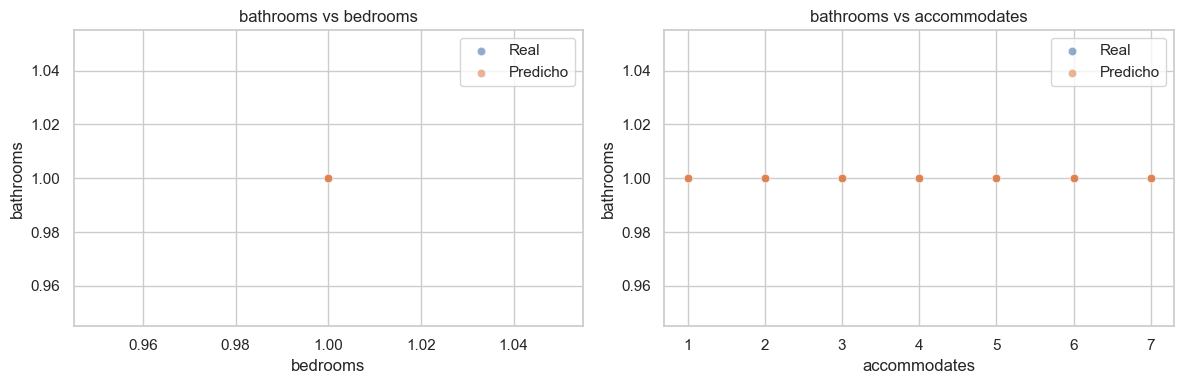

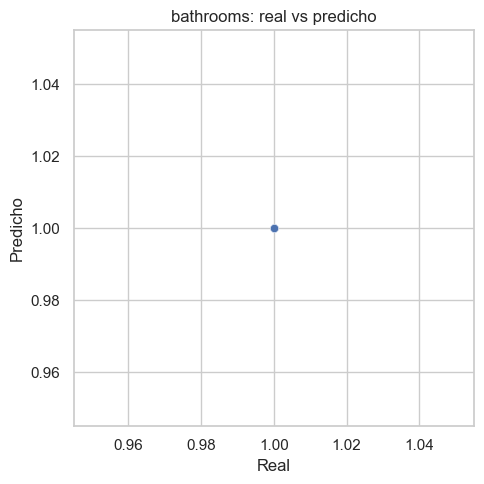

In [59]:

plot_model_graphs(d, y, X, y_pred_8, 'bathrooms')


In [60]:

y = 'reviews_per_month'
X = ['estimated_occupancy_l365d', 'number_of_reviews']
_prep_numeric([y] + X)
d = df[[y] + X].dropna()
model_9 = LinearRegression().fit(d[X], d[y])
print("Coef:", dict(zip(X, model_9.coef_)))
print("Intercept:", model_9.intercept_)
print("R2:", model_9.score(d[X], d[y]))


Coef: {'estimated_occupancy_l365d': np.float64(0.000859101786828718), 'number_of_reviews': np.float64(0.005119750324083429)}
Intercept: 0.2136859451875897
R2: 0.12049968346503681


In [61]:

y_pred_9 = model_9.predict(d[X])
y_pred_9


array([0.2597637 , 0.46455371, 0.23416495, ..., 0.21368595, 0.21368595,
       0.21368595], shape=(36322,))

In [62]:

df['pred_reviews_per_month'] = np.nan
df.loc[d.index, 'pred_reviews_per_month'] = y_pred_9
df[['pred_reviews_per_month', 'reviews_per_month'] + X].head(10)


,pred_reviews_per_month,reviews_per_month,estimated_occupancy_l365d,number_of_reviews
0,0.259764,0.08,0.0,9.0
1,0.464554,0.26,0.0,49.0
2,0.234165,0.03,0.0,4.0
3,0.223925,1.00,0.0,2.0
4,0.218806,0.03,0.0,1.0
5,0.223925,0.24,0.0,2.0
6,0.280243,0.07,0.0,13.0
7,0.223925,0.24,0.0,2.0
8,0.234165,0.03,0.0,4.0
9,0.403117,0.21,0.0,37.0


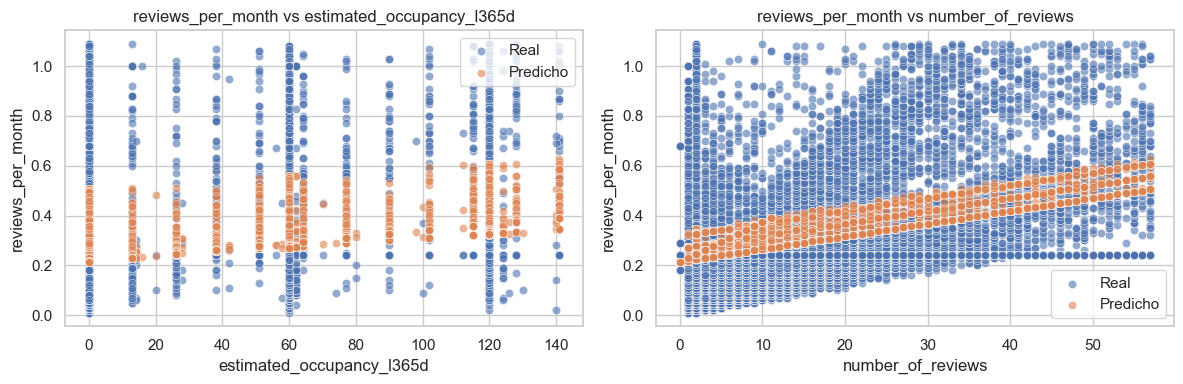

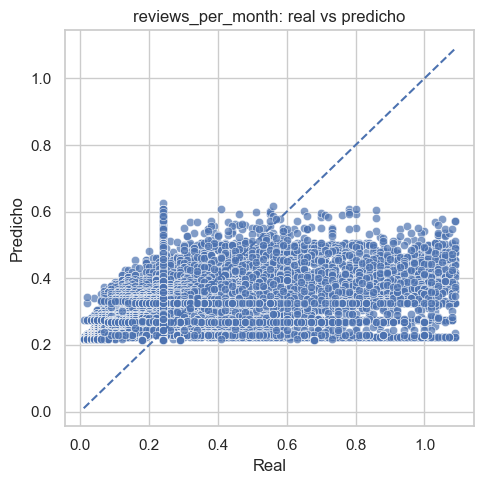

In [63]:

plot_model_graphs(d, y, X, y_pred_9, 'reviews_per_month')
